# Explore the dataset and visualize them using pandas and seaborn package

Standardize the Breast cancer dataset available in Datasets directory using different scaling methods available with scikit learn and viualize the data as heatmap, density plot and box plot.
1. StandardScaler
2. MinMaxScaler


(569, 30)
benign       357
malignant    212
dtype: int64
(198, 32)
nonrecurring    151
recurring        47
Name: outcome, dtype: int64


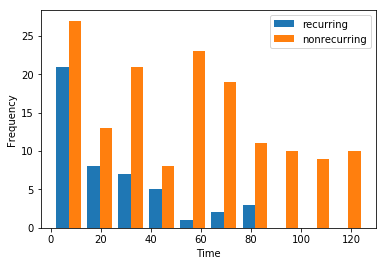

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def image_features():
    names = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
             'concavity', 'concave points', 'symmetry', 'fractal dimension']

    columns = ["mean_{}".format(v) for v in names]
    columns.extend(["se_{}".format(v) for v in names])
    columns.extend(["worst_{}".format(v) for v in names])
    return columns


def load_wisconsin_breast_cancer_diagnosis(local_file='../datasets/wdbc.data'):
    columns = ['ID', 'diagnosis']
    columns.extend(image_features())

    data = pd.read_csv(local_file, index_col=0, header=None,
                       names=columns, dtype={'diagnosis': 'category'})
    y = data.diagnosis.cat.rename_categories(['benign', 'malignant'])
    X = data.drop('diagnosis', axis=1).astype(float)
    return X, y


def load_wisconsin_breast_cancer_prognosis(local_file='../datasets/wpbc.data'):
    columns = ['ID', 'outcome', 'time']
    outcomes = columns[1:]
    extra_vars = ['tumor_size', 'lymph_node_status']
    columns.extend(image_features())
    columns.extend(extra_vars)

    data = pd.read_csv(local_file, index_col=0, header=None,
                       names=columns, dtype={'outcome': 'category'},
                       na_values=['?'])
    y = data.loc[:, outcomes]
    y.outcome.cat.rename_categories(['nonrecurring', 'recurring'], inplace=True)
    X = data.drop(outcomes, axis=1).astype(float)
    return X, y 

X_diagnosis, y_diagnosis = load_wisconsin_breast_cancer_diagnosis()

print(X_diagnosis.shape)
print(y_diagnosis.value_counts())
#%%
X_prognosis, y_prognosis = load_wisconsin_breast_cancer_prognosis()

print(X_prognosis.shape)
print(y_prognosis.outcome.value_counts())

plt.hist([
    y_prognosis.time[y_prognosis.outcome == 'recurring'],
    y_prognosis.time[y_prognosis.outcome == 'nonrecurring'],
], label=['recurring', 'nonrecurring'])
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.legend()
plt.show()

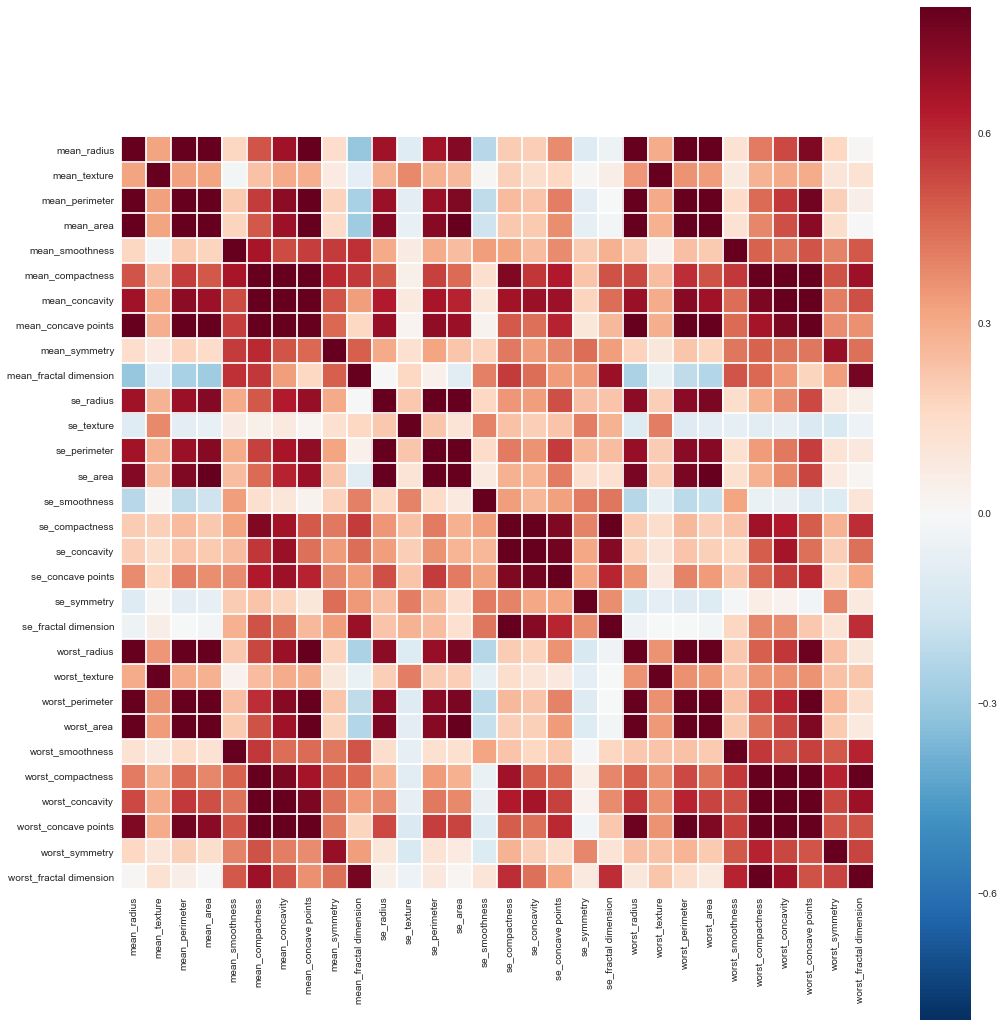

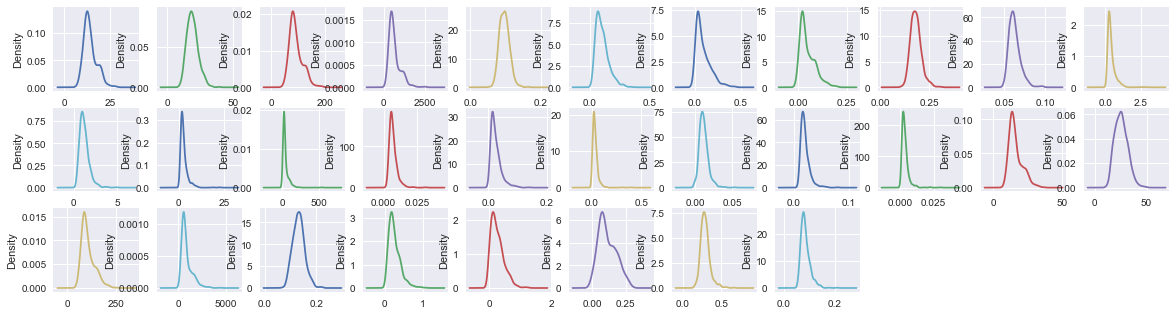

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix

# correlation
corrmat=X_diagnosis.corr(method='pearson')

# Visualization of correlation
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)


for i in range(30):
    
        ax.axhline(i, c="w")
        ax.axvline(i, c="w")
f.tight_layout()

# density
X_diagnosis.plot(kind='density', subplots=True, layout=(11,11),figsize=(20,20), sharex=False,legend=False)
plt.show()

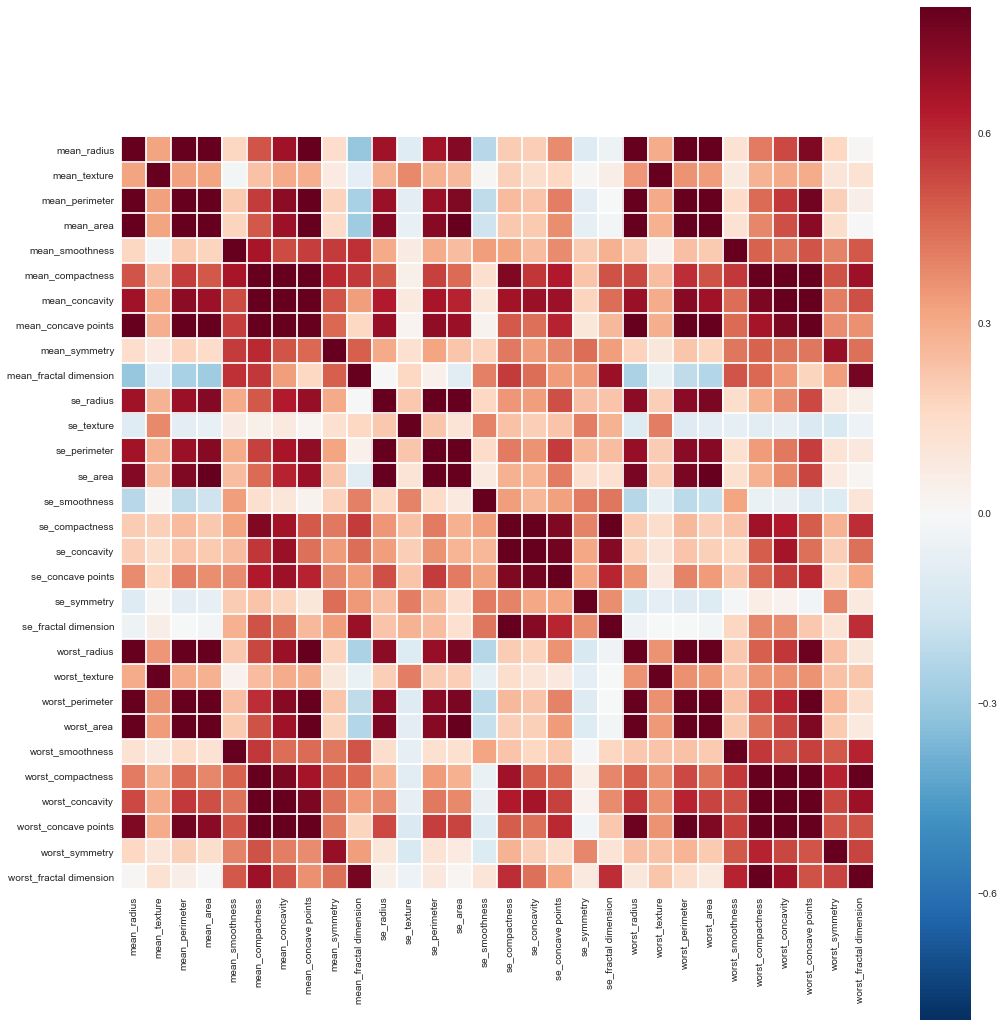

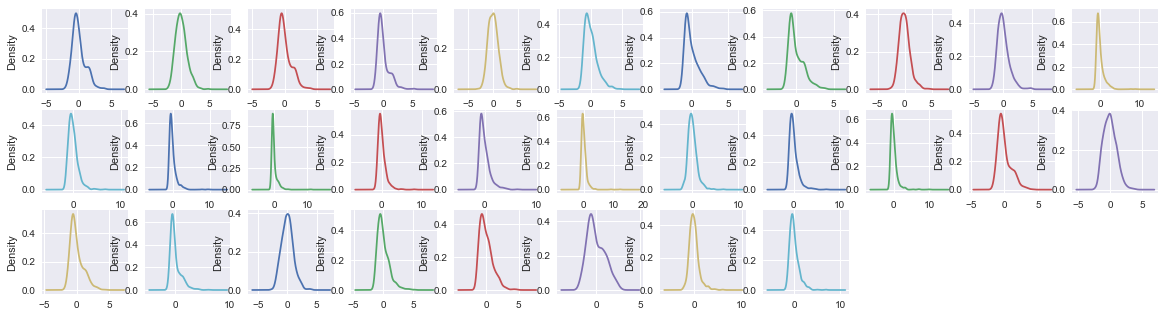

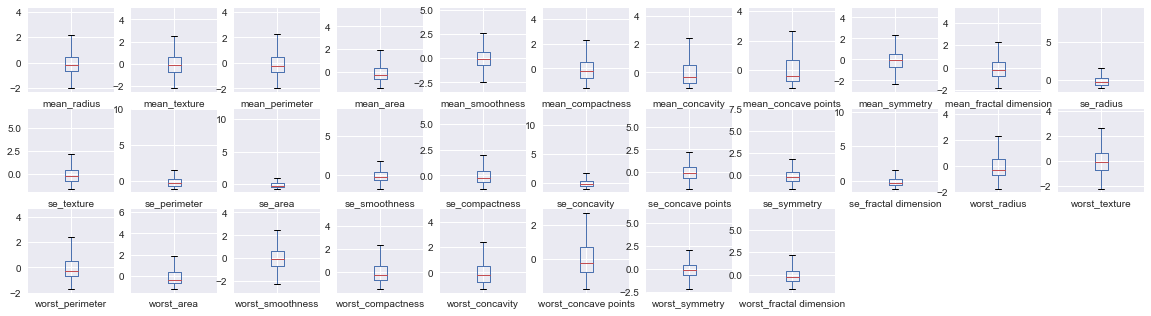

In [3]:
# standardize the features by substracting the mean
# dividing by the standard deviation
x_mean = np.mean(X_diagnosis, axis=0)
x_std = np.std(X_diagnosis, axis=0)
x_train_std = (X_diagnosis - x_mean) / x_std
              

# correlation
corrmat=x_train_std.corr(method='pearson')

# Visualization of correlation
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)


for i in range(30):
    
        ax.axhline(i, c="w")
        ax.axvline(i, c="w")
f.tight_layout()

# density
x_train_std.plot(kind='density', subplots=True, layout=(11,11),figsize=(20,20), sharex=False,legend=False)
plt.show()              
             
# box and whisker plots
x_train_std.plot(kind='box', subplots=True, layout=(11,11), figsize=(20,20),sharex=False, sharey=False)
plt.show() 

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix

#Standardize feature using sklearn
from sklearn.preprocessing import StandardScaler



stdSlr = StandardScaler().fit(X_diagnosis)
x_diagnosis_std=stdSlr.transform(X_diagnosis)
print(x_diagnosis_std.dtype)

print(type(x_diagnosis_std))

float64
<class 'numpy.ndarray'>


<class 'pandas.core.frame.DataFrame'>


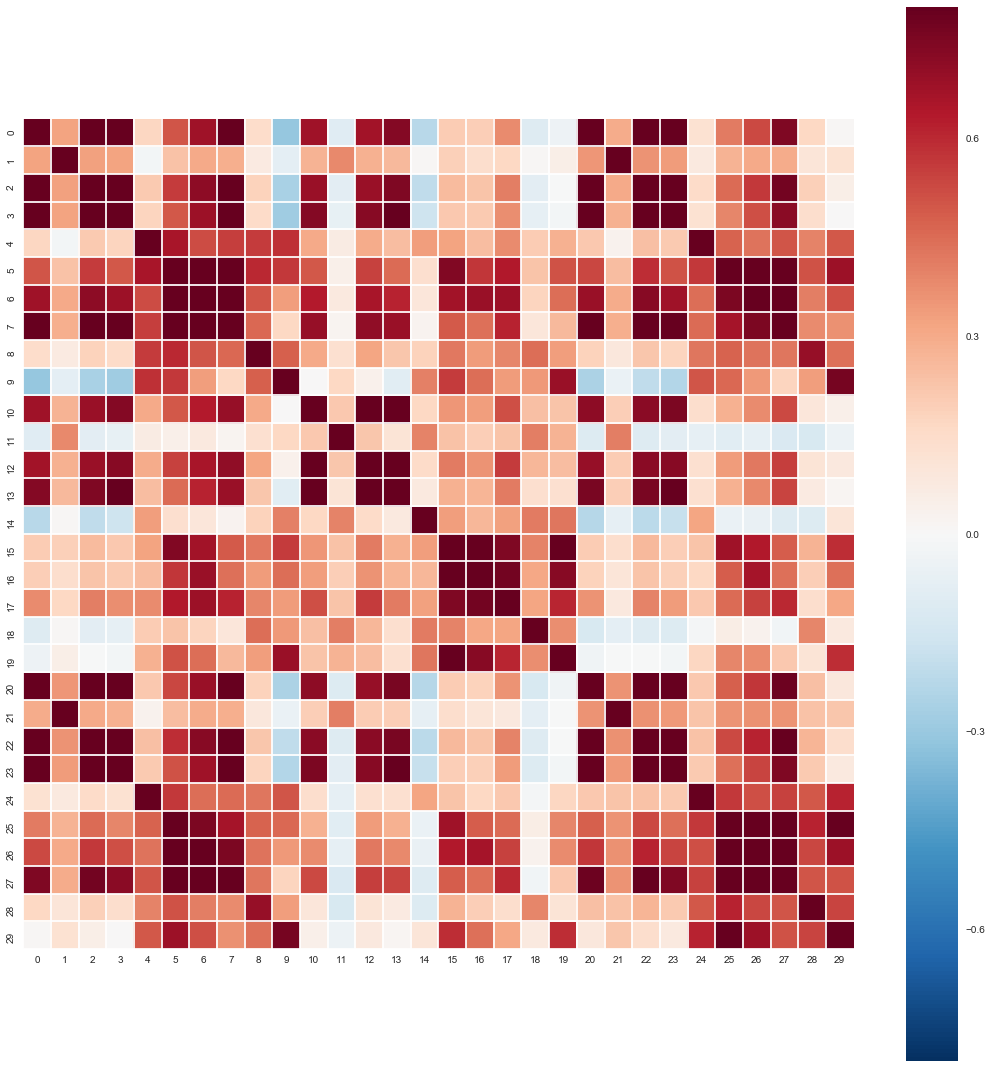

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledXdiagnosis = scaler.fit_transform(X_diagnosis)

#conversion of array to dataframe to ease the visualization of correlation

dfDiagnosis=pd.DataFrame(rescaledXdiagnosis)

print(type(dfDiagnosis))


# correlation
corrmat_diagnosis=dfDiagnosis.corr(method='pearson')

# Visualization of correlation
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Draw the heatmap using seaborn
sns.heatmap(corrmat_diagnosis, vmax=.8, square=True)


for i in range(30):
    
        ax.axhline(i, c="w")
        ax.axvline(i, c="w")
f.tight_layout()
plt.show()